# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('04-x_train-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('04-x_test-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('04-y_train-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('04-y_test-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)


# **NORMALIZACION DE CARACTERISTICAS**

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [4]:
x_train_std

array([[-0.78173602,  0.24193748, -0.34913977, ..., -0.43737943,
         0.62070082, -0.37742097],
       [-0.74382941, -0.17062957,  0.1303548 , ..., -0.78596861,
        -0.80506745, -0.38435582],
       [ 0.72661163, -1.30143975,  1.28804638, ...,  0.89974974,
        -0.07564796,  0.34550626],
       ...,
       [-0.52781525,  1.07146838, -1.41445285, ..., -0.93939675,
        -1.92580304, -0.51442763],
       [ 2.31977721,  0.11063187, -0.02965829, ...,  0.87780418,
        -0.10823295,  0.64106373],
       [ 1.01642796,  0.75602162, -0.72471747, ...,  0.64664552,
        -0.01615534,  0.69839273]])

# **MODELO DE MARCHINE LEARNING**

In [5]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13312     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,236
Trainable params: 83,236
Non-trainable params: 0
_________________________________________________________________


In [6]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)#1000
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1000 70
#1000 67
#1250 69
#1300 66
#995 68

Epoch 1/800
16/16 [==============================] - 1s 3ms/step - loss: 1.1295 - accuracy: 0.5010
Epoch 2/800
16/16 [==============================] - 0s 2ms/step - loss: 0.8931 - accuracy: 0.6401
Epoch 3/800
16/16 [==============================] - 0s 3ms/step - loss: 0.7956 - accuracy: 0.6524
Epoch 4/800
16/16 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.7219
Epoch 5/800
16/16 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.7669
Epoch 6/800
16/16 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7669
Epoch 7/800
16/16 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.8303
Epoch 8/800
16/16 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.8405
Epoch 9/800
16/16 [==============================] - 0s 3ms/step - loss: 0.3979 - accuracy: 0.8650
Epoch 10/800
16/16 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8814
Epoch 11/

array([0, 0, 1, 3, 1, 1, 2, 0, 3, 0, 3, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 2,
       1, 0, 0, 3, 3, 3, 0, 0, 0, 1, 3, 1, 1, 2, 1, 0, 0, 1, 1, 0, 3, 3,
       0, 1, 1, 1, 3, 0, 3, 0, 0, 1, 1, 3, 1, 2, 1, 3, 3, 2, 3, 3, 3, 1,
       1, 1, 2, 3, 1, 2, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 2, 3, 2, 0, 1, 1,
       0, 0, 3, 2, 0, 0, 3, 1, 2, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 2, 3,
       3, 0, 3, 1, 1, 1, 3, 1, 1, 0, 3, 0, 1])

# **EVALUACION**

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.77      0.71      0.74        38
           2       0.69      0.75      0.72        12
           3       0.73      0.75      0.74        36

    accuracy                           0.77       123
   macro avg       0.76      0.77      0.76       123
weighted avg       0.77      0.77      0.77       123



In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.77      0.71      0.74        38
           2       0.69      0.75      0.72        12
           3       0.73      0.75      0.74        36

    accuracy                           0.77       123
   macro avg       0.76      0.77      0.76       123
weighted avg       0.77      0.77      0.77       123

Matriz de confusión, sin normalización
[[32  2  2  1]
 [ 3 27  0  8]
 [ 0  2  9  1]
 [ 3  4  2 27]]


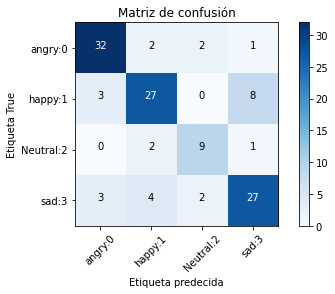

In [9]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')

# **GUARDANDO MODELOS **

Normalizacion

In [10]:
import joblib
joblib.dump(sc , 'Normalizacion_seleccionCaracteristicas.pkl')

['Normalizacion_seleccionCaracteristicas.pkl']

Modelo entrenado

In [11]:
import joblib
joblib.dump(clf , 'Modelo_Prueba171.pkl')

INFO:tensorflow:Assets written to: ram://fde93a30-27f8-4b35-b639-f446a04a496f/assets


['Modelo_Prueba171.pkl']